# K Clustering on graphs. 
Si consideri un grafo G=(V,E) non completo. 
Ogni partizione di V in k sottoinsiemi V 1 ,..,V k , indice k sottografi G(V 1 ),..G(V k ). Si determini la partizione tale per cui il numero di archi i cui estremi appartengono a sottografi diversi (i.e., la dimensione del multi-cut) è minimo.

In [173]:

# librerie
import networkx as nx
import matplotlib.pyplot as plt
from pulp import *
import numpy as np
import community
import itertools
import pprint

from networkx.algorithms import approximation

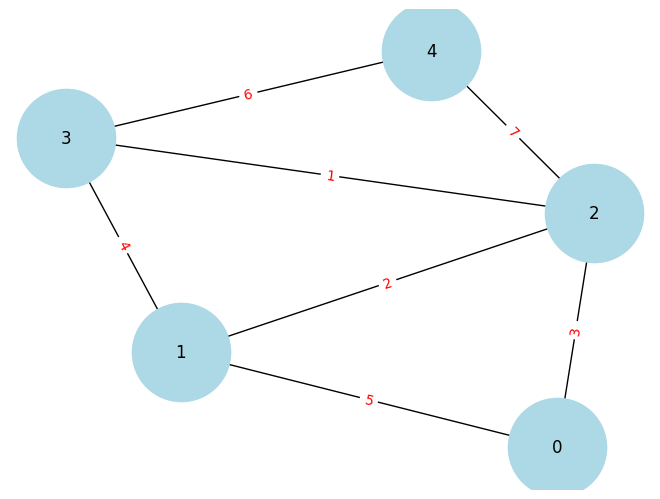

ClusterGraph:
MINIMIZE
None
VARIABLES

{0: {0: x_0_0, 1: x_0_1, 2: x_0_2, 3: x_0_3, 4: x_0_4},
 1: {0: x_1_0, 1: x_1_1, 2: x_1_2, 3: x_1_3, 4: x_1_4},
 2: {0: x_2_0, 1: x_2_1, 2: x_2_2, 3: x_2_3, 4: x_2_4},
 3: {0: x_3_0, 1: x_3_1, 2: x_3_2, 3: x_3_3, 4: x_3_4},
 4: {0: x_4_0, 1: x_4_1, 2: x_4_2, 3: x_4_3, 4: x_4_4}}
ClusterGraph:
MINIMIZE
1*x_0_0 + 1*x_0_1 + 1*x_0_2 + 1*x_0_3 + 1*x_0_4 + 1*x_1_0 + 1*x_1_1 + 1*x_1_2 + 1*x_1_3 + 1*x_1_4 + 1*x_2_0 + 1*x_2_1 + 1*x_2_2 + 1*x_2_3 + 1*x_2_4 + 1*x_3_0 + 1*x_3_1 + 1*x_3_2 + 1*x_3_3 + 1*x_3_4 + 1*x_4_0 + 1*x_4_1 + 1*x_4_2 + 1*x_4_3 + 1*x_4_4 + 0
VARIABLES
0 <= x_0_0 <= 1 Integer
0 <= x_0_1 <= 1 Integer
0 <= x_0_2 <= 1 Integer
0 <= x_0_3 <= 1 Integer
0 <= x_0_4 <= 1 Integer
0 <= x_1_0 <= 1 Integer
0 <= x_1_1 <= 1 Integer
0 <= x_1_2 <= 1 Integer
0 <= x_1_3 <= 1 Integer
0 <= x_1_4 <= 1 Integer
0 <= x_2_0 <= 1 Integer
0 <= x_2_1 <= 1 Integer
0 <= x_2_2 <= 1 Integer
0 <= x_2_3 <= 1 Integer
0 <= x_2_4 <= 1 Integer
0 <= x_3_0 <= 1 Integer
0 <= x_3_1 <

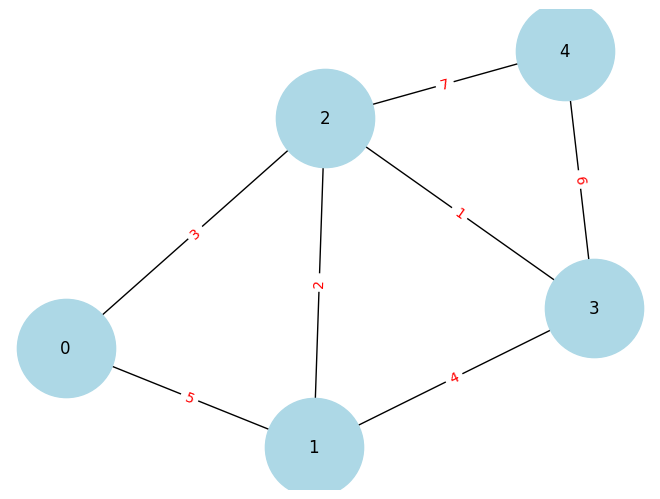

In [181]:

# Creazione del grafo
G = nx.Graph()

# Aggiunta dei nodi al grafo
G.add_nodes_from([0, 1, 2, 3, 4])

# Aggiunta degli archi con i relativi pesi
edges_with_weights = [
    (0, 1, {'weight': 5}),
    (0, 2, {'weight': 3}),
    (1, 2, {'weight': 2}),
    (1, 3, {'weight': 4}),
    (2, 3, {'weight': 1}),
    (2, 4, {'weight': 7}),
    (3, 4, {'weight': 6}),
]
G.add_edges_from(edges_with_weights)

# Disegno del grafo
pos = nx.spring_layout(G)  # Calcolo della posizione dei nodi
nx.draw(G, pos, with_labels=True, node_size=5000, node_color='lightblue', font_size=12)

# Estrazione dei pesi degli archi per creare un dizionario con le etichette
edge_labels = {(edge[0], edge[1]): edge[2]['weight'] for edge in G.edges(data=True)}

# Disegno delle etichette degli archi
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='red')

# Visualizzazione della figura
plt.show()


# Creazione del problema
create_cluster_graph = LpProblem("ClusterGraph", LpMinimize)
print(create_cluster_graph)
# minimize the number of edges in the graph
min = 0
k = 2

# Creazione delle variabili
# x_ij = 1 se l'arco (i,j) è presente nel cluster, 0 altrimenti
x = LpVariable.dicts("x", (G.nodes(), G.nodes()), 0, 1, LpInteger)

# Utilizza pprint per stampare le variabili x con ritorni a capo

pprint.pprint(x)

# Creazione della funzione obiettivo
create_cluster_graph += lpSum([x[i][j] for i in G.nodes() for j in G.nodes()])
print(create_cluster_graph)

# Creazione dei vincoli
# Ogni nodo deve essere assegnato ad un solo cluster
for i in G.nodes():
    create_cluster_graph += lpSum([x[i][j] for j in G.nodes()]) == 1
    sum = 0
    for j in G.nodes():
        sum += x[i][j]
    create_cluster_graph += sum == 1
    
# Ogni cluster deve avere almeno k nodi
for i in G.nodes():
    create_cluster_graph += lpSum([x[j][i] for j in G.nodes()]) >= k
    
# Ogni cluster deve avere al massimo n-k nodi
for i in G.nodes():
    create_cluster_graph += lpSum([x[j][i] for j in G.nodes()]) <= len(G.nodes()) - k
    
# Ogni arco deve essere assegnato ad un solo cluster
for i in G.nodes():
    for j in G.nodes():
        create_cluster_graph += x[i][j] + x[j][i] <= 1
        
# Risoluzione del problema
create_cluster_graph.solve()

# Stampa dello stato della soluzione
print("Status:", LpStatus[create_cluster_graph.status])

# Stampa del valore della funzione obiettivo
print("Objective value:", value(create_cluster_graph.objective))

# Stampa delle variabili
for v in create_cluster_graph.variables():
    print(v.name, "=", v.varValue)
    
# Stampa dei cluster
for i in G.nodes():
    for j in G.nodes():
        if x[i][j].varValue == 1:
            print("Node", i, "and node", j, "are in the same cluster")
            
# visualizzazione del grafo con i cluster
pos = nx.spring_layout(G)  # Calcolo della posizione dei nodi
nx.draw(G, pos, with_labels=True, node_size=5000, node_color='lightblue', font_size=12)

# Estrazione dei pesi degli archi per creare un dizionario con le etichette
edge_labels = {(edge[0], edge[1]): edge[2]['weight'] for edge in G.edges(data=True)}

# Disegno delle etichette degli archi
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='red')

# Visualizzazione della figura
plt.show()

    


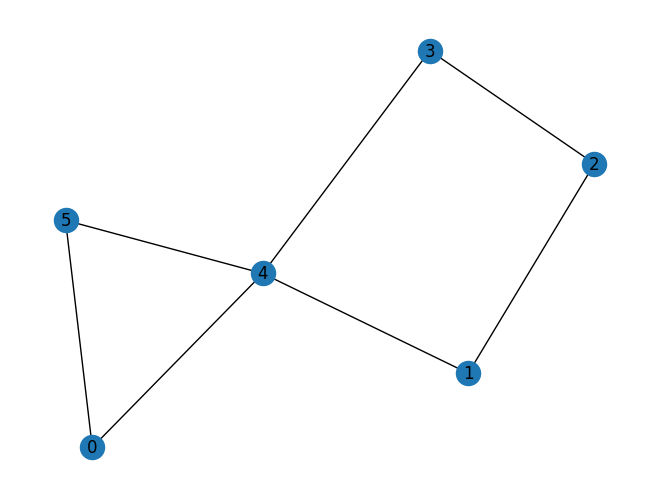

TypeError: 'NoneType' object is not subscriptable

In [ ]:

def minimum_multi_cut(G, k):
    # Inizializziamo la partizione con tutti i vertici in un singolo sottoinsieme
    partition = [[v for v in range(G.number_of_nodes())]]

    # partition = [[v for v in range(G.V)]]

    # Finché il numero di sottoinsiemi non raggiunge k
    while len(partition) < k:
        min_cut_size = float('inf')
        min_cut_partition = None

        # Troviamo il taglio minimo tra i sottoinsiemi esistenti
        for i in range(len(partition)):
            for j in range(i + 1, len(partition)):
                cut_size = G.cut_size(partition[i], partition[j])

                if cut_size < min_cut_size:
                    min_cut_size = cut_size
                    min_cut_partition = (i, j)

        # Uniamo i due sottoinsiemi con il taglio minimo
        partition[min_cut_partition[0]] += partition[min_cut_partition[1]]
        del partition[min_cut_partition[1]]

    return partition

def cut_size(G, subset1, subset2):
    cut_size = 0

    # Contiamo il numero di archi che connettono i due sottoinsiemi
    for u in subset1:
        for v in G.adj_list[u]:
            if v in subset2:
                cut_size += 1

    return cut_size

#create a graph

# Definizione il numero di nodi e archi desiderati
num_nodi = 6
num_archi = 7

# Crea un grafo randomico non completo
G = nx.gnm_random_graph(num_nodi, num_archi, directed=False)


# Visualizza il grafo
nx.draw(G, with_labels=True, pos=nx.spring_layout(G))
plt.show()

# Calcola la partizione con il multicut minimo
k = 2  # Numero di sottoinsiemi
partition = minimum_multi_cut(G, k)

# Visualizza il grafo con le partizioni
pos = nx.spring_layout(G)
for i, subset in enumerate(partition):
    nx.draw_networkx_nodes(G, pos, nodelist=subset, node_color=f"C{i}", label=f"Subset {i+1}")
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.legend()
plt.show()
    


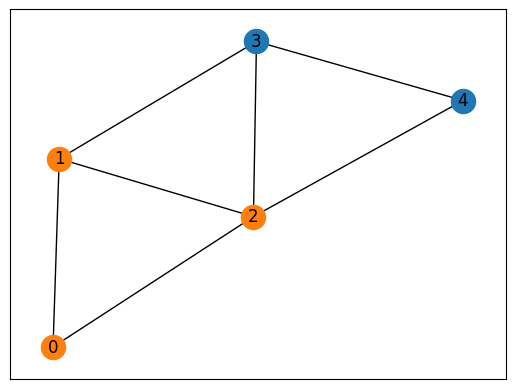

In [ ]:
# Perform community detection using the Louvain algorithm
partition = community.best_partition(G)

# Create a layout for the graph
layout = nx.spring_layout(G)

# Draw the graph with partitions
for node, community_id in partition.items():
    nx.draw_networkx_nodes(G, layout, nodelist=[node], node_color=f"C{community_id}")
nx.draw_networkx_edges(G, layout)
nx.draw_networkx_labels(G, layout)

# Display the graph
plt.show()


Per creare un min-cut, in genere, è necessario avere i pesi associati agli archi del grafo. Nel contesto del problema di min-cut, i pesi degli archi rappresentano i costi o i valori associati a tagliare quell'arco. Il problema del min-cut mira a trovare il taglio di costo minimo, ovvero il taglio di costo più basso possibile per separare il grafo in due o più componenti connesse.

Se il grafo non ha pesi sugli archi (ovvero, tutti gli archi hanno lo stesso peso), allora il min-cut è semplicemente un taglio di archi che separa il grafo in due o più componenti connesse, e il numero di archi nel taglio è il più piccolo possibile. In questo caso, è possibile utilizzare il metodo di ottimizzazione del flusso massimo (Max-Flow Min-Cut) per trovare il min-cut.

Tuttavia, se ci sono pesi sugli archi, il problema del min-cut diventa un problema di ottimizzazione più generale, e il flusso massimo non può essere utilizzato direttamente per trovare la soluzione ottima. Invece, si può utilizzare un solutore di programmazione lineare come Gurobi o PuLP per risolvere il problema di min-cut con pesi sugli archi.

Se i pesi sugli archi sono assenti e desideri comunque trovare un taglio in grado di separare il grafo in componenti connesse, puoi semplicemente utilizzare il metodo `networkx.minimum_edge_cut(graph)` di NetworkX. Questo metodo troverà un taglio di archi di dimensione minima, ma tieni presente che in assenza di pesi sugli archi, tutti gli archi hanno lo stesso "peso" per il problema di min-cut. Di conseguenza, non otterrai un min-cut ottimo in termini di valore della funzione obiettivo (costo totale del taglio).